# 用户分组

In [48]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 设置字体为黑体
plt.rcParams['font.family'] = 'Heiti TC'
plt.rcParams['axes.unicode_minus'] = False 

df_sales = pd.read_csv('易速鲜花订单记录.csv')
df_sales.head()

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


In [47]:
from matplotlib import pyplot as plt
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

for i in a:
    print(i)

.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Anonymous Pro for Powerline
Anonymous Pro for Powerline
Anonymous Pro for Powerline
Anonymous Pro for Powerline
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Arimo for Powerline
Arimo for Powerline
Arimo for Powerline
Arimo for Powerline
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bo

/var/folders/2c/fkxn2_m52bx9gzxgt6wc8h000000gn/T/ipykernel_35465/3674827327.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()


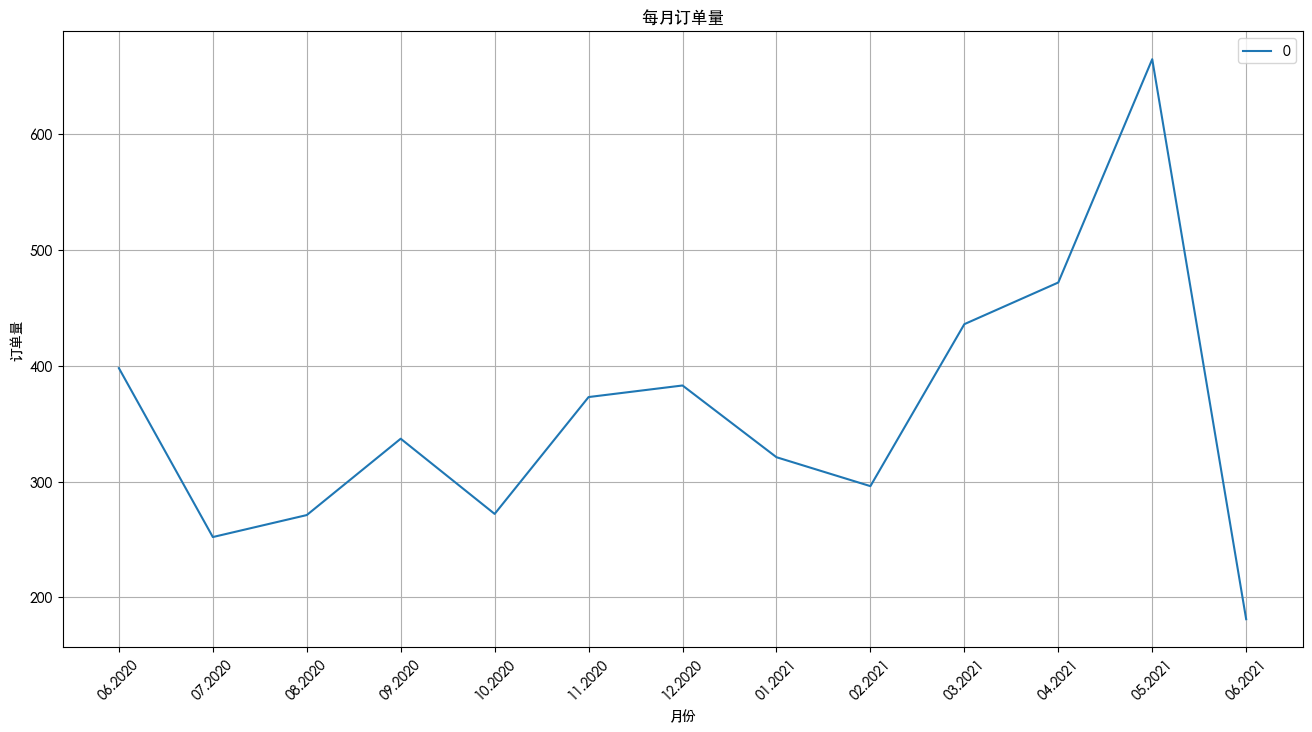

In [49]:
import matplotlib.pyplot as plt

df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(16,8),title='每月订单量')
ax.set_xlabel('月份')
ax.set_ylabel('订单量')
#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show()

# 数据清洗

In [9]:
df_sales = df_sales.drop_duplicates() # 删除重复数据
df_sales.isna().sum()

订单号     0
产品码     0
消费日期    0
产品说明    0
数量      0
单价      0
用户码     0
城市      0
dtype: int64

In [10]:
df_sales.describe()

,消费日期,数量,单价,用户码
count,85920,85920.000000,85920.000000,85920.000000
mean,2021-01-04 22:50:58.891759616,10.115747,3.599711,15338.080389
min,2020-06-01 09:09:00,-9360.000000,0.000000,14681.000000
25%,2020-10-03 12:42:00,2.000000,1.250000,15022.000000
50%,2021-01-22 11:45:00,4.000000,1.950000,15334.000000
75%,2021-04-19 13:58:00,12.000000,3.750000,15673.000000
max,2021-06-09 12:31:00,3114.000000,38970.000000,16019.000000
std,NaN,49.114285,134.410498,391.309086


In [11]:
df_sales = df_sales.loc[df_sales['数量']>0] # 删除数量小于等于0的记录
df_sales.describe()

,消费日期,数量,单价,用户码
count,84112,84112.000000,84112.000000,84112.000000
mean,2021-01-05 01:14:46.564342784,10.760236,3.005032,15337.732963
min,2020-06-01 09:09:00,1.000000,0.000000,14681.000000
25%,2020-10-03 12:42:00,2.000000,1.250000,15021.000000
50%,2021-01-22 11:45:00,5.000000,1.950000,15333.000000
75%,2021-04-19 15:08:00,12.000000,3.750000,15674.000000
max,2021-06-09 12:31:00,3114.000000,3155.950000,16019.000000
std,NaN,34.018906,15.365085,392.074855


# 特征工程

In [12]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据 

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


In [13]:
df_user = pd.DataFrame(df_sales['用户码'].unique())
df_user.columns = ['用户码']
df_user = df_user.sort_values(by='用户码', ascending=True).reset_index(drop=True)
df_user.head()

,用户码
0,14681
1,14682
2,14684
3,14687
4,14688


In [22]:
# 求R值
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) 
df_recent_buy = df_sales.groupby('用户码')['消费日期'].max().reset_index()
df_recent_buy.columns = ['用户码','最近日期']
df_recent_buy['R值'] = (df_recent_buy['最近日期'].max() - df_recent_buy['最近日期']).dt.days
df_user = pd.merge(df_user, df_recent_buy[['用户码','R值']], on='用户码')
df_user.head()

,用户码,R值
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


In [23]:
# 求F值
df_frequency = df_sales.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_frequency对象
df_frequency.columns = ['用户码','F值'] #设定字段名称
df_user = pd.merge(df_user, df_frequency, on='用户码') #把消费频率整合至df_user结构
df_user.head() #显示头几行数据

,用户码,R值,F值
0,14681,70,7
1,14682,187,2
2,14684,25,390
3,14687,106,15
4,14688,7,324


In [24]:
# 求M值
df_revenue = df_sales.groupby('用户码').总价.sum().reset_index() #根据消费总额，构建df_revenue对象
df_revenue.columns = ['用户码','M值'] #设定字段名称
df_user = pd.merge(df_user, df_revenue, on='用户码') #把消费金额整合至df_user结构
df_user.head() #显示头几行数据

,用户码,R值,F值,M值
0,14681,70,7,498.95
1,14682,187,2,52.00
2,14684,25,390,1201.51
3,14687,106,15,628.38
4,14688,7,324,5579.10


<Axes: title={'center': '新进度分布直方图'}, ylabel='Frequency'>

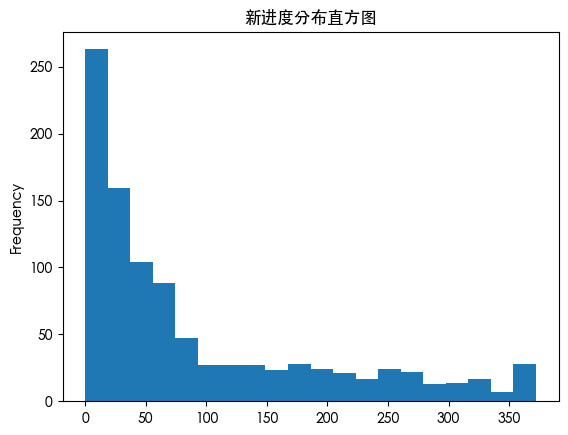

In [50]:
df_user['R值'].plot(kind='hist', bins=20, title = '新进度分布直方图') #R值直方图

<Axes: title={'center': 'F hist'}, ylabel='Frequency'>

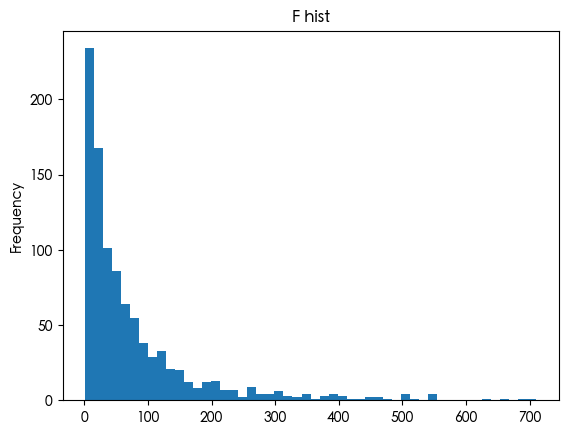

In [51]:
df_user.query('F值 < 800')['F值'].plot(kind='hist', bins=50, title = 'F hist') #F值直方图


# 显示手肘图确定K值

In [41]:
from sklearn.cluster import KMeans

def show_elbow(df):
    distance_list = [] 
    K = range(1,10)
    for k in K:
        kmeans = KMeans(n_clusters=k, max_iter=100)
        kmeans.fit(df)
        distance_list.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))
    plt.plot(K, distance_list, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared error')
    plt.title('elbow method')
    

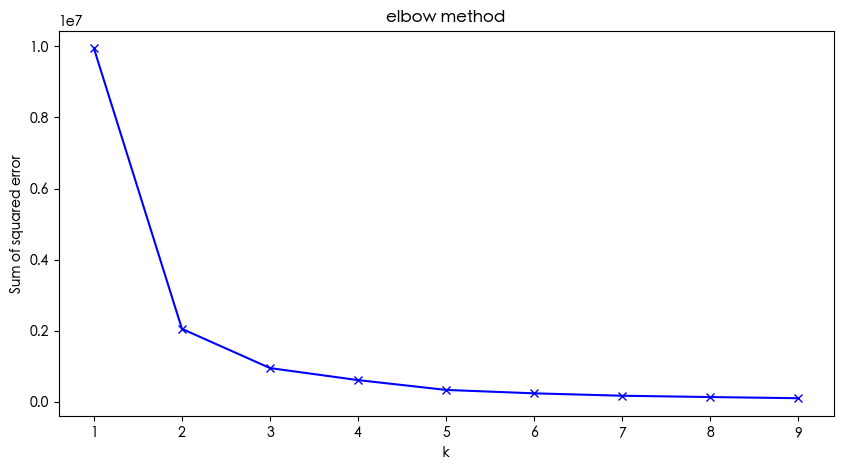

In [52]:
show_elbow(df_user[['R值']]) #显示R值聚类K值手肘图

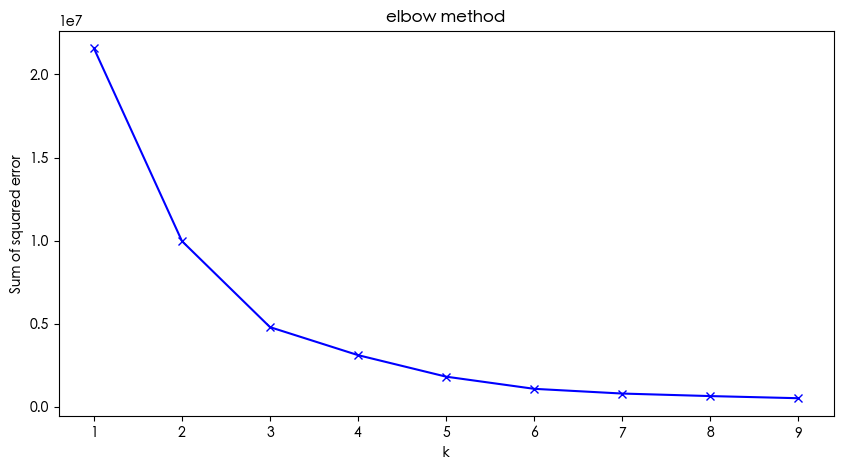

In [53]:
show_elbow(df_user[['F值']]) #显示F值聚类K值手肘图

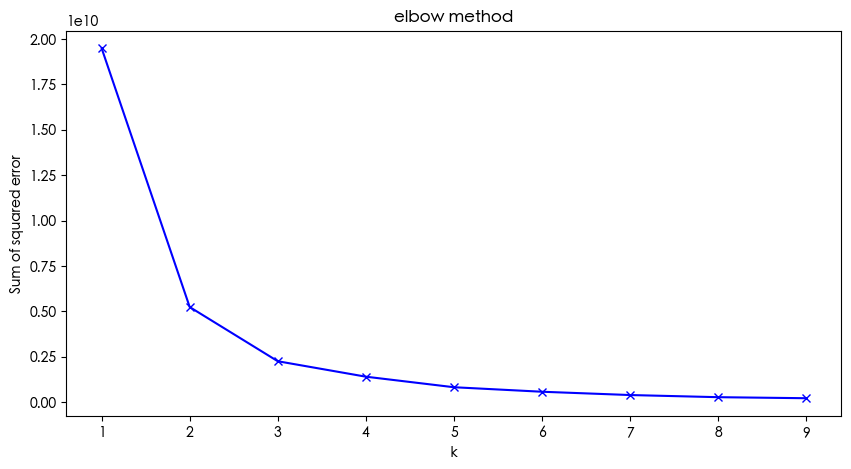

In [54]:
show_elbow(df_user[['M值']]) #显示M值聚类K值手肘图

# 创建和训练模型

In [68]:
from sklearn.cluster import KMeans

kmeans_R = KMeans(n_clusters=3, max_iter=100)
kmeans_F = KMeans(n_clusters=4, max_iter=100)
kmeans_M = KMeans(n_clusters=4, max_iter=100)

kmeans_R.fit(df_user[['R值']])
kmeans_F.fit(df_user[['F值']])
kmeans_M.fit(df_user[['M值']])


KMeans(max_iter=100, n_clusters=4)

In [69]:
df_user['R值层级'] = kmeans_R.predict(df_user[['R值']])
df_user.head()


,用户码,R值,F值,M值,R值层级
0,14681,70,7,498.95,0
1,14682,187,2,52.00,2
2,14684,25,390,1201.51,0
3,14687,106,15,628.38,2
4,14688,7,324,5579.10,0


In [70]:
df_user.groupby('R值层级')['R值'].describe()

,count,mean,std,min,25%,50%,75%,max
R值层级,,,,,,,,
0,664.0,32.088855,25.141763,0.0,10.00,25.0,50.00,94.0
1,138.0,298.094203,45.436550,231.0,255.25,292.5,334.50,372.0
2,178.0,157.162921,37.340870,95.0,126.00,156.5,188.75,225.0


In [ ]:
# 定义一个order_cluster函数为聚类排序
def order_cluster(cluster_name, target_name, df, ascending=False):
    # 按聚类结果分组，计算目标字段的均值，并创建新的数据框 df_new
    df_new = df.groupby(cluster_name)[target_name].mean().reset_index()
    
    # 根据目标字段的均值进行排序
    df_new = df_new.sort_values(by=target_name, ascending=ascending).reset_index(drop=True)
    
    # 创建索引字段
    df_new['index'] = df_new.index
    
    # 基于聚类名称将 df_new 还原为原始数据框 df，并添加索引字段
    df_new = pd.merge(df, df_new[[cluster_name, 'index']], on=cluster_name)
    
    # 删除聚类名称字段
    df_new = df_new.drop([cluster_name], axis=1)
    
    # 将索引字段重命名为聚类名称字段
    df_new = df_new.rename(columns={"index": cluster_name})
    
    # 返回排序后的 df_new 对象
    return df_new